<a href="https://colab.research.google.com/github/victory06/TFG/blob/master/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Titulo**
*Curvo*
**Negrita**
- Punto
- Punto
  - Punto
  - Punto

1. Enumerado
2. Enumerado

Indice:
1. [Funciones auxiliares](#sec:auxiliares)
2. [Leer base de datos](#sec:lecturabd)

```codigo```

Hacer ecuaciones:

\begin{equation}
F1 = 2*\frac{precision*recall}{precision+recall}
\end{equation}

En la misma linea:  $sensitivity = \frac{TP}{TP+FN}$

Introducir imagen:

<img src="https://i.imgur.com/jqbfLUY.png" width="400" alt="Matriz de confusión para dos clases">

Otra imagen:

![Frontera de decisión de una función discriminante lineal en clasificación](https://i.imgur.com/f6dqpWP.png)

In [ ]:
"""
Lee las bases de datos y comprueba si hay datos perdidos:
    - path: indica la ruta del archivo con la base de datos
"""
import pandas as pd
import numpy as np
import collections as col
import seaborn as sns
def readData(path_data, path_names):
  data = pd.read_csv(path_data, sep=" ", header=None)
  names_col = pd.read_csv(path_names, sep=",", header=None)
  if data.isnull().values.any():
    print("Hay datos perdidos")
  else:
    print("No hay datos perdidos")

  # Tomamos los nombres de los snpis para nombrar las columnas
  # Añadimos los nombres "Family ID", "Gender" y "Affection Status" que faltan
  names_c = names_col.to_numpy()[:,:].astype('U13')
  # En la columna 0 estan los nombres de los SNIPS
  names_column = names_c[:,0]
  names_column = np.repeat(names_column,2)
  names_column = np.insert(names_column, 0, "Gender", axis=0)
  names_column = np.insert(names_column, 0, "Family ID", axis=0)

  df = data.to_numpy()[:,:].astype('U13')
  df = df.astype(int)
  # Predecimos el affection status
  y = df[:,5]
  # Borramos la columna que queremos predecir
  x_np = np.delete(df, 5, 1)
  # Como nombre de las columnas vamos a establecer el ID del inivididuo
  names_row = df[:,1]
  
  # Borramos los ID. No se puede entrenar con los ID porque entonces da 1
  # de accuracy: predice padres 0 e hijos 2 ignorando los SNIPS.
  # Hay que dejar solo el family code.
  x_np = np.delete(x_np, 1, 1)
  x_np = np.delete(x_np, 1, 1)
  x_np = np.delete(x_np, 1, 1)
  x_np = np.delete(x_np, 2, 1)

  x_df = pd.DataFrame(x_np,index=names_row, columns = names_column)
  y_df = pd.DataFrame(y).values.flatten()

  return x_df, y_df

def metricas(y_real, y_pred, etiquetas):
  clasf = classification_report(y_real, y_pred, target_names=etiquetas)
  print(clasf)
  return clasf

def explorarBD(x_train, x_test, x, y, y_train, y_test):
  print("Número de instancias y número de variables:", x.shape)
  print("Valores de clase:",pd.unique(y))
  print("Número de instancias para cada clase: ",col.Counter(y))
  print("Número de instancias para cada clase test: ",col.Counter(y_test))
  print("Número de instancias para cada clase train: ",col.Counter(y_train))
  print("Numero de instancias en entrenamiento: {}; y test: {}".format(len(x_train),len(x_test)))
    

In [ ]:
from sklearn.model_selection import train_test_split
x, y= readData('/content/drive/MyDrive/TFG/Autism/AutismDuoChrom26.iou','/content/drive/MyDrive/TFG/Autism/Human1M-Duov3_B_PosSortedChrom26.cols')
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25)
explorarBD(x_train, x_test, x, y , y_train, y_test)
x[:10]

No hay datos perdidos
Número de instancias y número de variables: (2592, 278)
Valores de clase: [0 2]
Número de instancias para cada clase:  Counter({0: 1728, 2: 864})
Número de instancias para cada clase test:  Counter({0: 443, 2: 205})
Número de instancias para cada clase train:  Counter({0: 1285, 2: 659})
Numero de instancias en entrenamiento: 1944; y test: 648


,Family ID,Gender,mitoa10045g,mitoa10045g,mitoa10551g,mitoa10551g,mitoa11252g,mitoa11252g,mitoa11468g,mitoa11468g,mitoa12309g,mitoa12309g,mitoa13106g,mitoa13106g,mitoa13264g,mitoa13264g,mitoa13781g,mitoa13781g,mitoa14234g,mitoa14234g,mitoa14583g,mitoa14583g,mitoa15245g,mitoa15245g,mitoa15302g,mitoa15302g,mitoa15759g,mitoa15759g,mitoa15925g,mitoa15925g,mitoa16163g,mitoa16163g,mitoa16164g,mitoa16164g,mitoa1738g,mitoa1738g,mitoa3349g,mitoa3349g,mitoa3481g,mitoa3481g,...,mitot3198c,mitot3198c,mitot3395c,mitot3395c,mitot4337c,mitot4337c,mitot4562c,mitot4562c,mitot479c,mitot479c,mitot491c,mitot491c,mitot4978c,mitot4978c,mitot5005c,mitot5005c,mitot5443c,mitot5443c,mitot5496c,mitot5496c,mitot6153c,mitot6153c,mitot6222c,mitot6222c,mitot6681c,mitot6681c,mitot6777c,mitot6777c,mitot7176c,mitot7176c,mitot8278c,mitot8278c,mitot9699c,mitot9699c,mitot9717c,mitot9717c,mitot9900c,mitot9900c,mitot9951c,mitot9951c
14735098,1473,2,22334,959,29766,2248,30279,2214,33220,1889,28449,2127,13822,1746,32253,2407,9314,1238,16128,1232,15981,1088,19379,2150,9680,23423,35057,2629,26916,2595,26563,4045,27678,1911,25690,1860,29967,2963,27527,2116,...,34306,1984,31571,2626,41764,3809,34002,4764,15127,1488,15306,1171,4023,22627,25763,2635,17751,1473,30844,2168,14000,2759,25362,4963,37516,2822,45068,2770,23974,1736,33994,6459,20553,3124,25098,3180,28441,2158,1542,14632
14735495,1473,2,22801,1021,28109,2526,29889,2429,34675,2404,26212,1977,12682,1664,31035,2723,8676,1043,15735,1263,14467,994,18329,2426,9407,23628,34813,2457,27558,2611,27184,4912,25506,1800,21101,1777,31548,3546,26478,1991,...,33908,2133,31673,2729,37058,4222,35967,5377,15499,1640,10744,853,4420,24776,23034,2312,17667,1728,33558,2600,14375,2688,24542,5841,34433,2848,43755,2771,21233,1748,34885,7338,18229,2970,24373,3305,27855,2471,1374,15580
14737323,1473,1,22304,875,25408,2094,23888,1487,28803,1507,26088,1992,10990,1118,26600,1914,6955,1008,12286,939,13329,923,19241,1856,8978,21502,31806,1832,22060,1728,21032,3440,19476,1156,17620,1212,29295,3355,22468,1615,...,30005,1530,29273,1999,36554,4043,32184,3659,16089,1242,12653,881,3423,20096,21553,1754,12520,863,30184,1670,12563,1948,20649,3451,35304,2433,42353,2046,21177,1262,31465,5373,14823,2491,19591,2264,26001,1777,1026,12652
14764648,1476,1,25543,1202,33551,2928,34600,2279,38084,2347,31710,2996,14315,2381,32888,2325,1539,8517,20569,1564,18666,1542,23388,2162,9707,24864,37689,3102,3483,27045,25046,3405,25728,1441,23777,1785,35002,3719,28566,2811,...,36356,1739,36532,2846,45931,4071,35973,4091,13863,1425,9765,825,33518,3185,25012,2312,18548,1691,38196,2491,18067,2698,26611,5264,42147,2742,47888,2287,27974,1834,25979,5228,22154,3277,27616,3218,27567,2016,22017,1227
14767102,1476,2,20893,819,29063,2423,2514,22772,31511,1871,28130,2053,13333,1633,33125,2284,7821,1254,3591,16940,17692,1303,21407,2041,8964,23890,35607,2030,27978,1994,24070,3813,22802,1358,25842,1781,31558,3403,27905,1901,...,33708,1488,31843,2289,41679,3541,37370,4749,17268,1367,12754,856,31346,3212,23579,2282,13323,1099,35262,2306,17558,2922,22413,5961,38408,2250,43446,2162,25185,1519,25999,4911,21067,3031,24504,2617,27466,2043,18855,1052
14767466,1476,1,24690,961,30324,2673,2843,28868,34110,2579,27814,2404,12973,2017,32203,2458,8472,1378,4058,15881,17097,1279,21518,2239,10455,27718,37972,2474,27802,5697,26028,4682,22438,1476,24602,1873,33630,3863,27199,1996,...,38135,1907,36022,2801,42015,4452,36655,4791,17372,1284,13763,956,32228,3593,26820,2663,16497,1553,37368,2465,15325,2744,22773,6435,38433,2755,46556,2631,25642,1839,30877,6666,19320,3187,25213,3242,28371,2094,20280,1085
14774516,1477,1,8688,267,10571,1070,10535,873,12005,1058,10320,1131,4926,413,11773,1113,1956,258,5797,341,5001,373,7775,979,3651,17084,12683,944,9446,924,10079,2172,7698,526,8511,956,12609,1814,8594,654,...,12686,710,11857,974,13584,1728,12574,2160,4707,562,3470,198,11029,1757,8857,1104,4652,441,12426,958,4151,1019,8040,3879,14932,1359,18740,1135,8391,553,9659,3063,6617,1198,8515,1176,10269,836,6273,268
14777017,1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(x_test) # predicción de cada etiqueta 

# imprimimos la etiqueta calculada para los 20 primeros datos de X_test
print(y_pred[:20]) 
print(y_test[:20])

[2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0]
[0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0]


In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.5601851851851852


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, x, y) #por defecto 5 particiones

print(scores) #los valores individuales de cada partición
print(np.mean(scores)) #la media de acierto global

[0.59537572 0.60500963 0.60810811 0.66409266 0.64478764]
0.6234747546886276


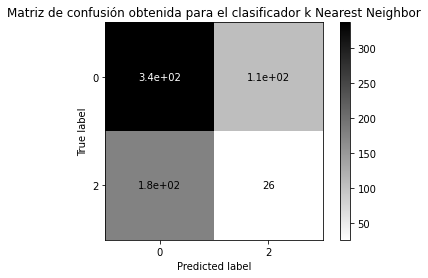

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       443
           2       0.20      0.13      0.15       205

    accuracy                           0.56       648
   macro avg       0.43      0.44      0.43       648
weighted avg       0.51      0.56      0.53       648

La medida F1 para el clasificador KNeighborsClassifier es 0.1543


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

#el parámetro cmap utilizar un mapa de color en azules para ser cómodo a la vista
metrics.plot_confusion_matrix(knn, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador k Nearest Neighbor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=2)
print("La medida F1 para el clasificador %s es %.4f"%(knn.__class__.__name__,f1))

Coef. independiente: [-6.08447372e-09]
Coef. por variable: [[-1.29053343e-05 -3.31278522e-07  2.02879211e-05 -3.07258061e-05
   8.66291642e-06  2.08258985e-05  1.23994988e-05  2.06590573e-05
   2.64858697e-05  1.67432537e-05  3.94763265e-05  6.94401118e-06
  -1.15599405e-05  1.34832055e-05  2.31961808e-06 -8.13913187e-05
   9.03073053e-06  8.62768851e-06 -8.48342322e-05 -9.13504551e-06
   2.78372416e-07 -1.96165877e-05  2.24834879e-06 -7.42009497e-06
   3.08047561e-06 -3.21803996e-06  7.62898024e-05 -1.35640207e-05
   2.19222922e-05  7.91478461e-06  2.74253730e-05  4.55158197e-05
   9.38703351e-06 -1.59350558e-05 -9.12927893e-07 -1.91835871e-05
   1.58264383e-05  1.16654061e-06  9.71951454e-06  1.93614628e-05
   1.86691193e-05  8.99598375e-06  2.36615210e-05  1.45116905e-05
   9.37587938e-06  1.30657655e-05 -7.26385052e-06  6.40564131e-06
  -8.72568314e-06 -1.12415414e-05 -2.80825139e-05 -4.24704347e-06
  -9.18684793e-06  9.64712840e-06  4.90579993e-06 -4.06458276e-06
   5.50803730e-06

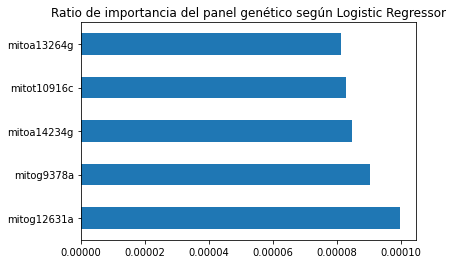


Valores de predicción originales (10 primeros):
[0 0 0 0 0 0 0 0 0 0]

Acierto de Logistic Regression en la partición de test: 0.6049382716049383


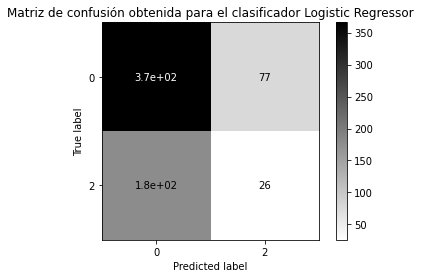

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       443
           2       0.25      0.13      0.17       205

    accuracy                           0.60       648
   macro avg       0.46      0.48      0.45       648
weighted avg       0.54      0.60      0.56       648

La medida F1 para el clasificador LogisticRegression es 0.1688


In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import normalize
lrm = linear_model.LogisticRegression()

lrm.fit(x_train, y_train)
print("Coef. independiente:",lrm.intercept_)
print("Coef. por variable:",lrm.coef_)
print()

importancia = np.abs(lrm.coef_[0]) #transformamos a una lista uni-dimensional
importancia_norm = normalize(importancia[:,np.newaxis], axis=0).ravel()
#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia, index=x_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Logistic Regressor")
plt.show()
print()

y_pred = lrm.predict(x_test)

print("Valores de predicción originales (10 primeros):")
print(y_pred[:10])
print()

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de Logistic Regression en la partición de test:", acc_score)

metrics.plot_confusion_matrix(lrm, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Logistic Regressor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=2)
print("La medida F1 para el clasificador %s es %.4f"%(lrm.__class__.__name__,f1))


In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de DT en la partición de test:", acc_score)

Acierto de DT en la partición de test: 0.625


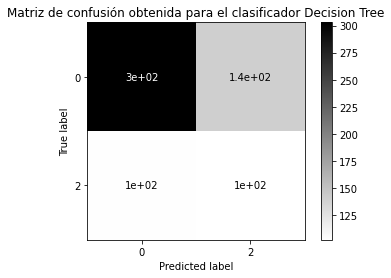

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       443
           2       0.42      0.50      0.46       205

    accuracy                           0.62       648
   macro avg       0.58      0.59      0.59       648
weighted avg       0.64      0.62      0.63       648

La medida F1 para el clasificador DecisionTreeClassifier es 0.4564


In [ ]:
metrics.plot_confusion_matrix(dt, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Decision Tree")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=2)
print("La medida F1 para el clasificador %s es %.4f"%(dt.__class__.__name__,f1))

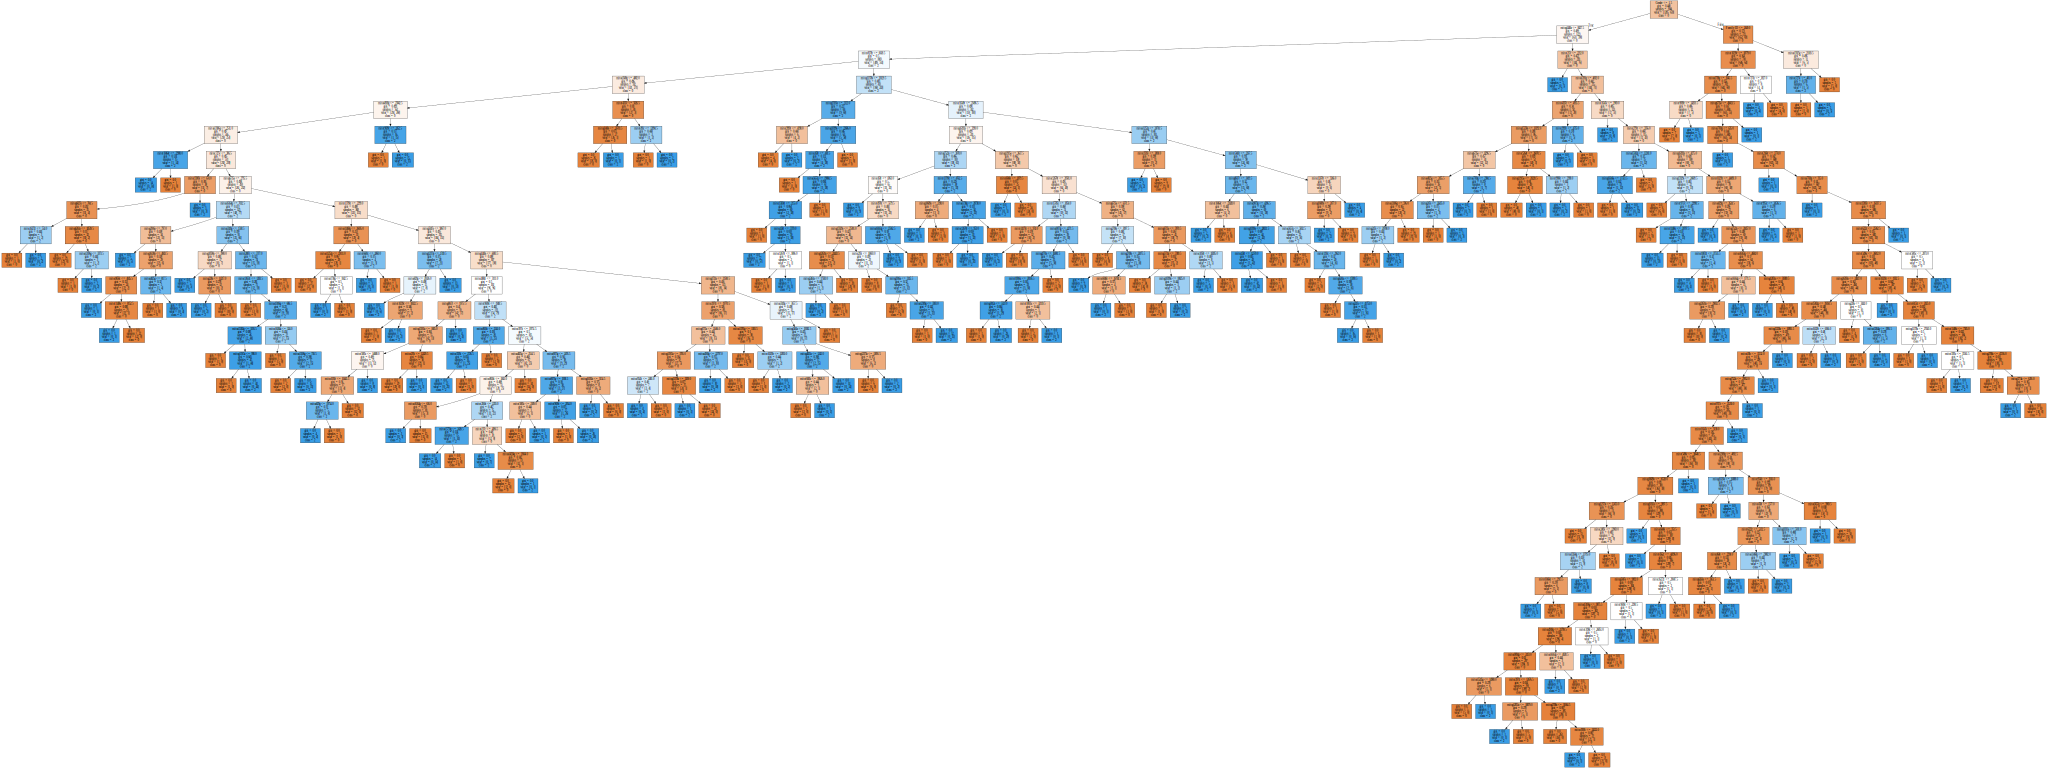

In [ ]:
#Bibliotecas necesarias para una mejor visualización
from graphviz import Source

#se pinta el árbol:
tree_graph = tree.export_graphviz(dt, out_file=None, 
                                  feature_names=x.columns,
                                  class_names=['0','2'],
                                  filled = True)
graph = Source(tree_graph)
graph

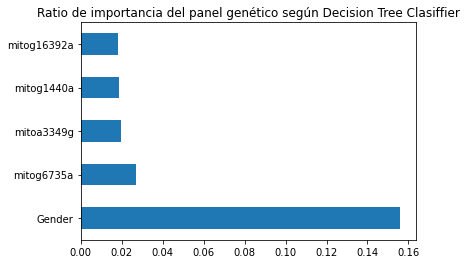

In [ ]:
#En primer lugar, se capturan los valores del ranking de importancia
importancia = dt.feature_importances_
#Se representan las 5 más importantes
(pd.Series(importancia, index=x_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Decision Tree Clasiffier")
plt.show()

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("El porcentaje de acierto obtenido es",acc*100)

El porcentaje de acierto obtenido es 47.99382716049383


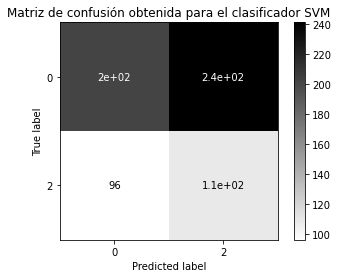

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       443
           2       0.31      0.53      0.39       205

    accuracy                           0.48       648
   macro avg       0.49      0.49      0.47       648
weighted avg       0.56      0.48      0.50       648

La medida F1 para el clasificador SVC es 0.5452


In [ ]:
metrics.plot_confusion_matrix(clf, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador SVM")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=0)
print("La medida F1 para el clasificador %s es %.4f"%(clf.__class__.__name__,f1))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBoost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.9,
                                 max_depth=2, random_state=0).fit(x_train, y_train)
GBoost.score(x_test, y_test)

0.6635802469135802

El porcentaje de acierto obtenido es 66.35802469135803


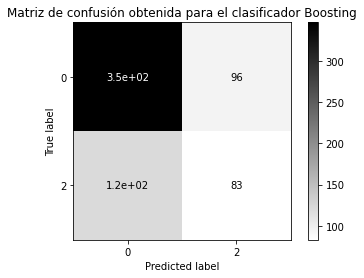

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       443
           2       0.46      0.40      0.43       205

    accuracy                           0.66       648
   macro avg       0.60      0.59      0.60       648
weighted avg       0.65      0.66      0.66       648

La medida F1 para el clasificador GradientBoostingClassifier es 0.4323


In [ ]:
y_pred = GBoost.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("El porcentaje de acierto obtenido es",acc*100)

metrics.plot_confusion_matrix(GBoost, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Boosting")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=2)
print("La medida F1 para el clasificador %s es %.4f"%(GBoost.__class__.__name__,f1))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
preproc=[("var", VarianceThreshold(0.01)),
        ("standardize", StandardScaler()),
        ("poly", PolynomialFeatures(2))]

pipe=Pipeline([('lr', LogisticRegression())])


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

params_grid=[
          {"lr":[LogisticRegression(penalty='l1',max_iter=500)],
                "lr__C":np.logspace(-2,2,5),
                "lr__solver":['lbfgs']},
          {"lr": [RandomForestClassifier(random_state = 1, n_jobs = -1, criterion = 'entropy')],
          "lr__n_estimators": [100, 250],
          "lr__max_depth": [9, 10]},
          {"lr": [SVC(class_weight='balanced', gamma='scale', degree=2)],
               "lr__C":np.logspace(-2,2,5),
               "lr__kernel": ['rbf', 'poly']}
            
]
best_lr=GridSearchCV(pipe,params_grid, scoring='accuracy', cv=5, n_jobs=-1)
best_lr.fit(x_train,y_train)
print("Parámetros del mejor clasificador:\n{}".format(best_lr.best_params_))
print("Accuracy en CV: {:0.3f}%".format(100.0 * best_lr.best_score_))
print("Accuracy en training: {:0.3f}%".format(
        100.0 * best_lr.score(x_train, y_train)))
print("Accuracy en test: {:0.3f}%".format(
        100.0 * best_lr.score(x_test, y_test)))


Parámetros del mejor clasificador:
{'lr': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False), 'lr__max_depth': 10, 'lr__n_estimators': 100}
Accuracy en CV: 67.182%
Accuracy en training: 93.056%
Accuracy en test: 68.056%


El porcentaje de acierto obtenido es 68.05555555555556


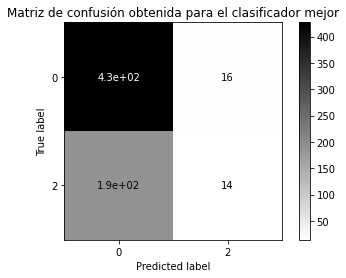

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       443
           2       0.47      0.07      0.12       205

    accuracy                           0.68       648
   macro avg       0.58      0.52      0.46       648
weighted avg       0.62      0.68      0.59       648

La medida F1 para el clasificador GridSearchCV es 0.1191


In [ ]:
y_pred = best_lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("El porcentaje de acierto obtenido es",acc*100)

metrics.plot_confusion_matrix(best_lr, x_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador mejor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label=2)
print("La medida F1 para el clasificador %s es %.4f"%(best_lr.__class__.__name__,f1))